In [ ]:
# CNN : 프로젝트
K.set_image_data_format('channels_first') # 'channels_last'

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
# flatten => cnn을 한줄로 만들어주는 것
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
(x_train, y_train), (x_test, y_test) =mnist.load_data()

Using TensorFlow backend.
C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_06\Anaconda3\envs

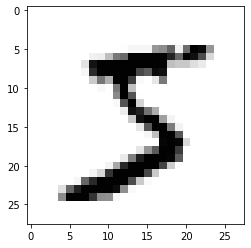

In [2]:
first_image = x_train[0, :, :]
plt.imshow(first_image, cmap = plt.cm.Greys)
plt.show()

In [3]:
# channel_first
# x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
# x_test = x_test.reshape(x_test.shape[0], 1, 28 ,28)

# channel_last
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

x_train = x_train.astype('float32') # 타입변경 => 255로 나눠주기 위해서
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples') # 60000
print(x_test.shape[0], 'test samples') # 10000
y_train = keras.utils.to_categorical(y_train, num_classes) # num_classes를 categorical로 변경함 -> categorical_crossentropy를 하기 위해서
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
model = Sequential()
# 아웃풋 필터 개수(32), 필터 사이즈(3,3)
# 입력데이터 28x28 => (128, 26(28-3+1), 26, 32) # valid(26,26)/ same(28,28): 모서리 특징 유지
model.add(Conv2D(32,3,3,activation='relu', # relu : 음수가 제거
                 input_shape=(28,28,1))) # input_shape를 channel_last에 맞게 설정해줘야함
model.add(Conv2D(64,3,3,activation='relu'))
# (128, 24, 24, 64)
model.add(MaxPooling2D(pool_size=(2,2))) # (128, 12, 12, 64) # 128은 장수
model.add(Dropout(0.25))
model.add(Flatten()) # 12x12x64 => 1차원(9216)
# FFNN, FC(fully-connected)
model.add(Dense(128, activation='relu')) # 가중치 (9216 x 128)
# (128 x 128)
model.add(Dropout(0.5)) # 계산회로만 생략
model.add(Dense(10, activation='softmax')) # 가중치 (128x10)
# (128 x 10)

C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

# epoch 마다 accuracy를 저장
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩 (재정의)
    def on_train_begin(self, logs={}): # 훈련시작시 이벤트 시작
        self.acc=[]
    def on_epoch_end(self, batch,logs={}):
        self.acc.append(logs.get('accuracy')) # logs: 우리가 알고자하는 정보가 담겨있음 (loss, accuracy)

history = AccuracyHistory()
# 이제는 train, test으로 나누서 했었음
# train, validation, test으로 나눔
model.fit(x_train, y_train,
         batch_size = batch_size, epochs = epochs, verbose=1,
         validation_data=(x_test, y_test),
         callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0260 - val_accuracy: 0.9921
Epoch 2/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0286 - val_accuracy: 0.9910
Epoch 3/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0285 - val_accuracy: 0.9917
Epoch 4/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0270 - val_accuracy: 0.9928
Epoch 5/12
60000/60000 [==============================] - 10s 162us/step - loss: 0.0212 - accuracy: 0.9930 - val_loss: 0.0267 - val_accuracy: 0.9922
Epoch 6/12
60000/60000 [==============================] - 10s 166us/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.0324 - val_accuracy: 0.9903
Epoch 7/12
60000/60000 [==============================] 

In [11]:
print(score[0]) # loss
print(score[1]) # accuracy

0.034014451934633476
0.9921000003814697


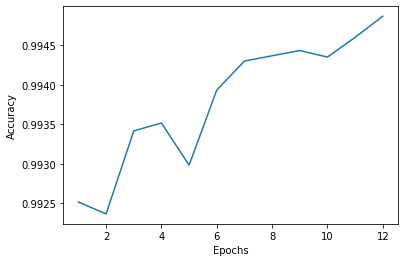

In [12]:
plt.plot(range(1,13), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 모델 저장 / 로딩

In [13]:
# HDFS(hadoop file system): model 구조 전체 저장
# 가중치, 구조, optimization statge 등이 저장
# json으로 저장할 수 있음 () 구조, 가중치를 별도로 저장해야함 ) => web에서도 tensorflow를 사용 
# tensorflow.js import
model.save("model_mnist.h5")
print("모델이 저장되었습니다.")
from keras.models import load_model

model = load_model('model_mnist.h5')
print("모델이 로딩되었습니다.")
model.summary()

모델이 저장되었습니다.
모델이 로딩되었습니다.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)         

In [15]:
# 레이어 정보 확인
l1 = model.layers[0]
l2 = model.layers[1]
print(l1.name)
print(l1.input_shape)
print(l1.activation)
print(l1.output_shape)

conv2d_1
(None, 28, 28, 1)
<function relu at 0x000001C996B48288>
(None, 26, 26, 32)


# imageDataGenertor

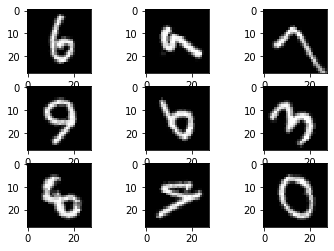

In [22]:


from matplotlib import pyplot
from keras import backend as K

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# datagen = ImageDataGenerator(horizontal_flip =True, vertical_flip=True)
# datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2) # 조금씩 움직임
# datagen = ImageDataGenerator(zca_whitening=True) # 이미지 백색화 => noise 제거(변수간 상관도를 없앰 : PCA)
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9,
                                     # augment
                                     save_to_dir='images', save_prefix='aug', save_format='png'):
    for i in range(0,9):
        pyplot.subplot(330+1+i)
        pyplot.imshow(X_batch[i].reshape(28,28),cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    break

In [23]:
from keras.datasets import cifar10
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
# airplane, automobile, bird, cat, deer, dog, frog, hirse, ship
# truck 분류 문제
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('X_train shape: ', X_train.shape)
print(X_train.shape[0], 'train smaples')
print(X_test.shape[0], 'test samples')
NB_CLASSES = 10
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 25s 0us/step
X_train shape:  (50000, 32, 32, 3)
50000 train smaples
10000 test samples


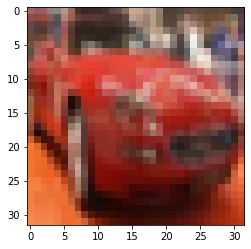

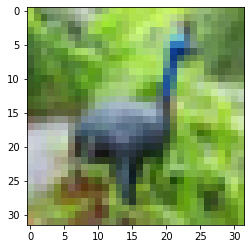

In [25]:
plt.imshow(X_train[5])
plt.grid(False)
plt.show()
plt.imshow(X_train[6])
plt.grid(False)
plt.show()

In [26]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [28]:
from keras.layers import Activation
# residual망의 영향을 받음 -> 결과가 좋아짐
# 32x32x3(입력데이터) => 32x32x32(가중치)
model = Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size = 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [30]:
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)       

In [32]:
# callback
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs = NB_EPOCH, validation_split=VALIDATION_SPLIT,
                   verbose=VERBOSE)

Train on 40000 samples, validate on 10000 samples
Epoch 1/40
40000/40000 [==============================] - 10s 257us/step - loss: 1.7842 - accuracy: 0.3561 - val_loss: 1.4226 - val_accuracy: 0.4938
Epoch 2/40
40000/40000 [==============================] - 10s 253us/step - loss: 1.3281 - accuracy: 0.5263 - val_loss: 1.1451 - val_accuracy: 0.5876
Epoch 3/40
40000/40000 [==============================] - 10s 251us/step - loss: 1.1248 - accuracy: 0.6040 - val_loss: 1.0891 - val_accuracy: 0.6169
Epoch 4/40
40000/40000 [==============================] - 10s 244us/step - loss: 0.9966 - accuracy: 0.6495 - val_loss: 0.9171 - val_accuracy: 0.6783
Epoch 5/40
40000/40000 [==============================] - 10s 246us/step - loss: 0.9084 - accuracy: 0.6812 - val_loss: 0.9199 - val_accuracy: 0.6837
Epoch 6/40
40000/40000 [==============================] - 10s 248us/step - loss: 0.8283 - accuracy: 0.7121 - val_loss: 0.9836 - val_accuracy: 0.6691
Epoch 7/40
40000/40000 [==============================] 

In [35]:
datagen = ImageDataGenerator(featurewise_center=False, # 똑같은 데이터 : Random 순서
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening = False, # 이미지 PCA노이즈 제거
                            rotation_range = 0,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = False)
datagen.fit(X_train)

In [36]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size = BATCH_SIZE),
                   samples_per_epoch = X_train.shape[0],
                   nb_epoch=NB_EPOCH,
                   verbose=VERBOSE)

Epoch 1/40
  3/390 [..............................] - ETA: 19s - loss: 1.1874 - accuracy: 0.6432

C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\ICT01_06\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., verbose=1, steps_per_epoch=390, epochs=40)`
  """


390/390 [==============================] - 17s 42ms/step - loss: 1.0102 - accuracy: 0.6739
Epoch 2/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9652 - accuracy: 0.6835
Epoch 3/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9395 - accuracy: 0.6935
Epoch 4/40
390/390 [==============================] - 17s 43ms/step - loss: 0.9425 - accuracy: 0.6899
Epoch 5/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9251 - accuracy: 0.6975
Epoch 6/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9196 - accuracy: 0.7006
Epoch 7/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9188 - accuracy: 0.6997
Epoch 8/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9074 - accuracy: 0.7013
Epoch 9/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9064 - accuracy: 0.7006
Epoch 10/40
390/390 [==============================] - 16s 42ms/step - loss: 0.9223 - accurac

In [42]:
score = model.evaluate(X_test, Y_test, batch_size = BATCH_SIZE, verbose = VERBOSE)
print("\nTest score: ", score[0])
print("\nTest accuracy: ",score[1])

10000/10000 [==============================] - 1s 85us/step

Test score:  0.9009555261611939

Test accuracy:  0.7014999985694885


In [38]:
# json
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [40]:
from keras.models import model_from_json
json_file = open('cifar10_architecture.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_weights.h5")
print("Loaded model from disk")

Loaded model from disk


# 문제
1. accuracy graph출력
2. 이미지 cat, dog을 다운로드한 다음 위의 모델로 예측해 보시오.

1.

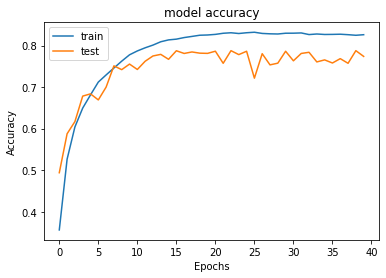

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

2.

In [67]:
import numpy as np # 이미지 사이즈 일치시키기 위해서
from imageio import imread
from skimage.transform import resize
from keras.models import model_from_json
img_names=['cat.jpg','dog.jpg']
imgs = [resize(imread(img_name), (32,32)).astype('float32')
       for img_name in img_names]
imgs = np.array(imgs) / 255
predictions = model.predict_classes(imgs)
print(predictions)

[4 4]


# 전이(transfer learning)학습 Application
- 반지도학습 (일부데이터의 라벨이 무) : Knn, Trenductive SVM
- 가중치 활용 : 그대로 적용
- 가중치 중 일부만 활용
- FFNN 부분만 학습해서 사용

# pre-trained, fine-tuning (FFNN부분만 Domain knowledge)

PIL image size (224, 224)


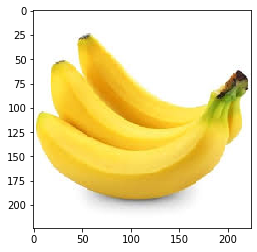

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)
[[('n07753592', 'banana', 0.99610066), ('n07749582', 'lemon', 0.0016311731), ('n07747607', 'orange', 0.00054173963), ('n07716906', 'spaghetti_squash', 0.00053685525), ('n07716358', 'zucchini', 0.000418416)]]


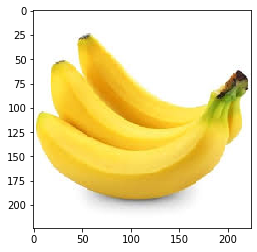

In [66]:
import PIL
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50
# 전처리
filename = 'banana.jpg'
# (224,224) 사이즈 fix
original = load_img(filename, target_size = (224,224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
print('numpy array size', numpy_image.shape)
# 차원확대하는 이유? 이미지 여러장 처리(전제조건)
# 1장의 이미지 (3차원 -> 4차원으로 확장)
image_batch = np.expand_dims(numpy_image, axis = 0)
print('image batch size', image_batch.shape)
# prepare the image for the resnet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())
# dense을 이용해서 모델을 생성
# label을 가지고 있고 => 확률로 나오게 되면 : decode_predictions로 라벨링
resnet_model = resnet50.ResNet50(weights = 'imagenet') # weights = 'imagenet'가 없으면 훈련이 안된 가중치로 초기화
# softmax 확률값으로 나옴 ( 상위 3개로 예측 )
predictions = resnet_model.predict(processed_image)
label = decode_predictions(predictions) # labelling
print(label)

In [65]:
label = decode_predictions(predictions, top=3) # labelling
print(label)

[[('n07753592', 'banana', 0.99610066), ('n07749582', 'lemon', 0.0016311731), ('n07747607', 'orange', 0.00054173963)]]


In [ ]:
# tf.keras
# fine-tunig : FFNN 부분만 학습
# imagedata generater

In [34]:
from numpy.random import randn
import pathlib
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from matplotlib.image import imread
from keras.preprocessing import image
# tf.enable_eager_execution() # 맨처음 실행할때 해줘야함
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_dir = "C:\\Users\\ICT01_06\\Documents\\Python\\jupyter\\전달\\flowers\\flower_photos"
data_dir = pathlib.Path(data_dir)
label_names={'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
label_key = ['daisy','dandelion','rose','sunflowers','tulips']

In [35]:
all_images = list(data_dir.glob('*/*')) # 파일명로딩
all_images = [str(path) for path in all_images]
random.shuffle(all_images)
# 이미지 주소에 대하여 라벨 할당해 줘야함
# 디렉토리의 경로를 관리하는 라이브러리
all_labels=[label_names[pathlib.Path(path).parent.name] for path in all_images]
data_size = len(all_images)
train_test_split = (int)(data_size*0.2) # 80% : 20%
x_train = all_images[train_test_split:]
x_test = all_images[:train_test_split]
y_train = all_labels[train_test_split:]
y_test = all_labels[:train_test_split]
IMG_SIZE = 160
BATCH_SIZE = 32

In [36]:
def _parse_data(x,y):
    image = tf.read_file(x) # 파일에는 헤더파일(압축방법에 대한 설명이 있음)
    image = tf.image.decode_jpeg(image, channels=3) # color 이미지
    image = tf.cast(image, tf.float32) # 데이터를 나누기위해서 float형으로 변경
    image = (image/127.5) - 1 # 0~2 (반으로 나눠주면) => -1~1 사이즈로 변화시키기위해서
    # 이미지 사이즈 통일 160x160(강제로 변환)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, y

def _input_fn(x,y):
    # 기본단위 요소로 분해
    ds = tf.data.Dataset.from_tensor_slices((x,y)) # dataset을 생성
    ds = ds.map(_parse_data) # 함수를 적용
    # buffer: 거쳐가는 기억공간
    ds = ds.shuffle(buffer_size=data_size) # 데이터가 shuffle이 될 수 있는 충분한 공간확보
    ds = ds.repeat() # 데이터가 부족하면 처음부터 다시 시작하라
    ds = ds.batch(BATCH_SIZE) # minibatch 사이즈
    ds = ds.prefetch(buffer_size=AUTOTUNE) # 32x3 , 32x5 ? 뭐가 유리할지는 slice가 결정
    return ds

train_ds = _input_fn(x_train,y_train)
validation_ds = _input_fn(x_test,y_test)

In [37]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# include_top = False인 경우는 input_shape=IMG_SHAPE을 지정
# convolution 가중치 학습이 무
# 망을 3개 생성
VGG16_MODEL = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                          weights='imagenet') # 1망

In [38]:
VGG16_MODEL.trainable = False # 학습하지 않겠다.
# flatten(가중치가 필요) 사용안함. -> GlobalAveragePooling2D (가중치 필요없음)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # 2망
# ffnn의 가중치는 학습
prediction_layer = tf.keras.layers.Dense(len(label_names), activation='softmax') # 3망

In [39]:
model = tf.keras.Sequential([VGG16_MODEL, # model (vgg16 가중치 + FFNN 가중치 학습)
                            global_average_layer,
                            prediction_layer])

In [40]:
# tf.train.AdamOptimizer() -> tensorflow사용해서
# sparse_categorical_crossentropy 희소행렬
#  - 100개의 라벨로 분류
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = tf.keras.losses.sparse_categorical_crossentropy, # 분류하는 것이 많을때 사용
             metrics=['accuracy'])

In [41]:
history = model.fit(train_ds, epochs=100, steps_per_epoch=2)
# history = model.fit(train_ds, epochs=100, steps_per_epoch=2, validation_steps=2,
#                     validation_data=validation_ds)

Epoch 1/100


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument: Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext_5]]
	 [[IteratorGetNext_5/_1001]]
  (1) Invalid argument: Invalid JPEG data or crop window, data size 2636
	 [[{{node DecodeJpeg}}]]
	 [[IteratorGetNext_5]]
0 successful operations.
0 derived errors ignored.

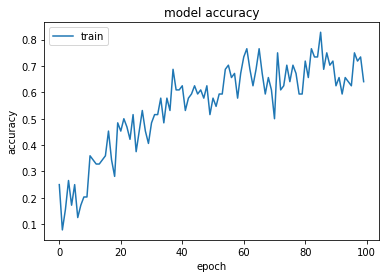

In [44]:
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()